In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df1 = pd.read_csv('last12months/12months/204300479.csv')
df2 = pd.read_csv('last12months/12months/220330932.csv')
df3 = pd.read_csv('last12months/12months/224228487.csv')

/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (21,23,25,27,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (24,26,49,50,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df1['dt'] = pd.to_datetime(df1['TIMESTAMP'],unit='ms')
df2['dt'] = pd.to_datetime(df2['TIMESTAMP'],unit='ms')
df3['dt'] = pd.to_datetime(df3['TIMESTAMP'],unit='ms')

In [5]:
def cleanCSV(df):
  cols_to_check = df.columns
  arr_col = []
  for col in df.columns:
    if df[col].isna().all():
        print("La colonna", col, "contiene solo valori NaN.")
        arr_col.append(col)
  df_cleaned = df.drop(columns=arr_col)
  df_cleaned = df_cleaned.replace('---', 0)
  return df_cleaned

In [6]:
def sortDf(df):
    if 'TIMESTAMP' in df.columns:
        df = df.sort_values('TIMESTAMP',ascending=True)
        df.index = range(len(df))
    else:
        print("La colonna TIMESTAMP non è presente nel dataframe.")
        return None
    return df

In [7]:
def resampleDf(df,datetime):
    if 'dt' in df.columns:
        df.set_index('dt', inplace=True)
    df_noNan = df.ffill()
    df_resampled = df_noNan.resample(datetime).ffill()
    df_resampled = df_resampled.replace('---', 0)
    return df_resampled
    

In [8]:
def checkFileInFolder(folder, file):
    if file in os.listdir(folder):
        return True
    return False

In [45]:
def getResampledDf(df,file_path):
    if not checkFileInFolder(folder ='last12months/12months',file=file_path):
        df_sorted = sortDf(df)
        df_sorted = cleanCSV(df_sorted)
        df_resampled = resampleDf(df_sorted,'30s')
        df_resampled.to_csv('last12months/12months/' + file_path)
        return df_sorted, df_resampled
    else:
        df_resampled = pd.read_csv('last12months/12months/'+ file_path)
        return None, df_resampled

    

In [46]:
df1_sorted, df1_resampled = getResampledDf(df1,'204300479_resampled30s.csv')
df2_sorted, df2_resampled = getResampledDf(df2,'220330932_resampled30s.csv')
df3_sorted, df3_resampled = getResampledDf(df3,'224228487_resampled30s.csv')

/tmp/ipykernel_17607/654433598.py:1: DtypeWarning: Columns (21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  df1_sorted, df1_resampled = getResampledDf(df1,'204300479_resampled30s.csv')
/tmp/ipykernel_17607/654433598.py:2: DtypeWarning: Columns (22,24,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  df2_sorted, df2_resampled = getResampledDf(df2,'220330932_resampled30s.csv')
/tmp/ipykernel_17607/654433598.py:3: DtypeWarning: Columns (21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  df3_sorted, df3_resampled = getResampledDf(df3,'224228487_resampled30s.csv')


: 

In [9]:
if not checkFileInFolder(folder ='last12months/12months',file='204300479_resampled30s.csv'):
    df1_sorted = sortDf(df1)
    df1_sorted = cleanCSV(df1_sorted)
    df1_resampled = resampleDf(df1_sorted,'30s')
    df1_resampled.to_csv('last12months/12months/204300479_resampled30s.csv')
else:
    df1_resampled = pd.read_csv('last12months/12months/204300479_resampled30s.csv')

if not checkFileInFolder(folder ='last12months/12months',file='220330932_resampled30s.csv'):
    df2_sorted = sortDf(df2)
    df2_sorted = cleanCSV(df2_sorted)
    df2_resampled = resampleDf(df2_sorted,'30s')
    df2_resampled.to_csv('last12months/12months/220330932_resampled30s.csv')
else:
    df2_resampled = pd.read_csv('last12months/12months/220330932_resampled30s.csv')

if not checkFileInFolder(folder ='last12months/12months',file='224228487_resampled30s.csv'):
    df3_sorted = sortDf(df3)
    df3_sorted = cleanCSV(df3_sorted)
    df3_resampled = resampleDf(df3_sorted,'30s')
    df3_resampled.to_csv('last12months/12months/224228487_resampled30s.csv')
else:
    df3_resampled = pd.read_csv('last12months/12months/224228487_resampled30s.csv')


/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (22,24,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
def getUniques(df):
    cols = df.columns
    dict_unique = dict.fromkeys(cols,None)
    for col in cols:
        dict_unique[col] = df[col].unique()
    return dict_unique

In [11]:
def getBooelan(dict):
    arr = []
    for key, value in dict.items():
        if len(value) < 4:
            b = True
            for v in value:
                # print(v,pd.isna(v))
                if pd.isna(v)==False:
                    if int(v) != 0 and int(v) != 1:
                        # print('ciao')
                        b = False
                        break
            # print(value,b)
            if b:
                arr.append(key)
    return arr

In [12]:
def printUniques(dict,tp):
    booleans = getBooelan(dict)
    for key, value in dict.items():
        counts = []
        if key in booleans and tp ==1:
            print(key, value)
        elif tp==2 and len(value) > 4 :
            print(key, value[0:5])

In [13]:
def countOccurences(df,dict):
    booleans = getBooelan(dict)
    counters = dict.fromkeys(booleans,None)
    for key, value in dict.items():
        if key in booleans:
            value = value[1:]
            counts = dict.fromkeys(value,None)
            for v in value:
                if not pd.isna(v):
                    counts[v]= df[key].value_counts()[v]
            counters[key] = counts
            # print(key, counts, max(counts))
    return counters
            

In [14]:
def getMax(dict):
    maxs = dict.fromkeys(dict.keys(),None)
    for key, value in dict.items():
        # print(key, value)
        for k, v in value.items():
            if v == max(value.values()):
                maxs[key] = k
    return maxs

In [15]:
def plotColumn(df,col):
    if col not in df.columns:
        print("La colonna", col, "non è presente nel dataframe.")
        return None
    df_toPlot = df[col]
    plt.plot(df_toPlot)
    try: 
        plt.ylim(0, max(df_toPlot.unique())+1)
    except:
        pass

    plt.show()


In [16]:
counters = countOccurences(df1_resampled,getUniques(df1_resampled))
getMax(counters)


{'Abilitazione al conteggio energia': 1.0,
 'Anomalia #1': 0.0,
 'Connection Status': 1.0,
 'Fattore di correzione': 1.0,
 'Flame status': 0.0,
 'M64A17E9': 0.0,
 'M64A17EB': 0.0,
 'M64A17ED': 0.0,
 'M64A17EF': 0.0,
 'Modo service': 0.0,
 'Modo vacanza': 0.0,
 'Riscaldamento attivo': 0.0,
 'Riscaldamento on': 0.0,
 'Sanitario attivo': 0.0,
 'Sanitario on': 0.0,
 'Standby': 0.0,
 'Standby giornaliero': None,
 'Stato attivazione BOOST sanitario': 0.0,
 'Temperatura esterna': 0.0,
 'Temperatura esterna mediata': 0.0,
 'Temperatura fumi': 0.0,
 'Temperatura scambiatore': 0.0}

In [17]:
dict_unique1 = getUniques(df1_resampled)
dict_unique2 = getUniques(df2_resampled)
dict_unique3 = getUniques(df3_resampled)
arr_booleani1 = getBooelan(dict_unique1)
arr_booleani2 = getBooelan(dict_unique2)
arr_booleani3 = getBooelan(dict_unique3)


In [18]:
print('1')
printUniques(dict_unique1,1)
print("--------------------------------------------------\n2")
printUniques(dict_unique2,1)
print("--------------------------------------------------\n3")
printUniques(dict_unique3,1)

1
Abilitazione al conteggio energia [nan  1.]
Anomalia #1 [nan  0.]
Connection Status [nan  0.  1.]
Fattore di correzione [nan  1.]
Flame status [nan  0.  1.]
M64A17E9 [nan  0.]
M64A17EB [nan  0.]
M64A17ED [nan  0.]
M64A17EF [nan  0.]
Modo service [nan  0.]
Modo vacanza [nan  0.]
Riscaldamento attivo [nan  0.  1.]
Riscaldamento on [nan  0.  1.]
Sanitario attivo [nan  0.  1.]
Sanitario on [nan  0.  1.]
Standby [nan  0.]
Standby giornaliero [0.]
Stato attivazione BOOST sanitario [nan  0.]
Temperatura esterna [nan  0.]
Temperatura esterna mediata [nan  0.]
Temperatura fumi [nan  0.]
Temperatura scambiatore [nan  0.]
--------------------------------------------------
2
Abilitazione al conteggio energia [nan  1.]
Connection Status [nan  0.  1.]
Fattore di correzione [nan  1.]
Flame status [nan  0.  1.]
M64A17E9 [nan  0.]
M64A17EB [nan  0.]
M64A17ED [nan  0.]
M64A17EF [nan  0.]
Modo service [nan  0.]
Modo vacanza [nan  0.]
Riscaldamento attivo [nan  0.  1.]
Riscaldamento on [nan  0.  1.]
San

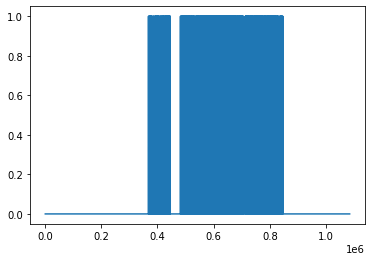

In [19]:
plotColumn(df1_resampled,'Riscaldamento attivo')

In [20]:
df_test = df1_resampled.copy()
for col in arr_booleani1:
    df_test[col] = df_test[col].replace(np.nan,0)
df_test.head(10)

,dt,TIMESTAMP,Abilitazione al conteggio energia,Anomalia #1,Caldaia,Caldaia giornaliero,Connection Status,Energia parziale in riscaldamento caldaia,Energia parziale in sanitario caldaia,Energia totale globale,...,Stato attivazione BOOST sanitario,Taratura sensore,Temperatura di mandata,Temperatura esterna,Temperatura esterna mediata,Temperatura fumi,Temperatura sanitario,Temperatura scambiatore,Velocita' ventilatore,WiFi signal
0,2022-06-30 22:00:00,1656626400000,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN
1,2022-06-30 22:00:30,1656626428307,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
2,2022-06-30 22:01:00,1656626449120,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,42.1,0.0,0.0,0.0,40.4,0.0,0.0,-66.0
3,2022-06-30 22:01:30,1656626489432,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,42.1,0.0,0.0,0.0,40.1,0.0,0.0,-60.0
4,2022-06-30 22:02:00,1656626519228,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,41.7,0.0,0.0,0.0,39.8,0.0,0.0,-60.0
5,2022-06-30 22:02:30,1656626549013,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,41.7,0.0,0.0,0.0,39.8,0.0,0.0,-60.0
6,2022-06-30 22:03:00,1656626569900,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,41.4,0.0,0.0,0.0,39.6,0.0,0.0,-59.0
7,2022-06-30 22:03:30,1656626599792,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,41.3,0.0,0.0,0.0,39.4,0.0,0.0,-60.0
8,2022-06-30 22:04:00,1656626630796,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,41.3,0.0,0.0,0.0,39.4,0.0,0.0,-60.0
9,2022-06-30 22:04:30,1656626658438,0.0,0.0,NaN,739466.0,0.0,NaN,NaN,NaN,...,0.0,NaN,41.1,0.0,0.0,0.0,39.2,0.0,0.0,-61.0


In [21]:
df1_anomalia = df1_resampled['Anomalia #1']
df1_anomalia.head(1150)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1145    NaN
1146    0.0
1147    0.0
1148    0.0
1149    0.0
Name: Anomalia #1, Length: 1150, dtype: float64

In [22]:
df_prova = df1_resampled.bfill()
df_prova.head(20)

,dt,TIMESTAMP,Abilitazione al conteggio energia,Anomalia #1,Caldaia,Caldaia giornaliero,Connection Status,Energia parziale in riscaldamento caldaia,Energia parziale in sanitario caldaia,Energia totale globale,...,Stato attivazione BOOST sanitario,Taratura sensore,Temperatura di mandata,Temperatura esterna,Temperatura esterna mediata,Temperatura fumi,Temperatura sanitario,Temperatura scambiatore,Velocita' ventilatore,WiFi signal
0,2022-06-30 22:00:00,1656626400000,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,42.1,0.0,0.0,0.0,40.4,0.0,0.0,-66.0
1,2022-06-30 22:00:30,1656626428307,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,42.1,0.0,0.0,0.0,40.4,0.0,0.0,-66.0
2,2022-06-30 22:01:00,1656626449120,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,42.1,0.0,0.0,0.0,40.4,0.0,0.0,-66.0
3,2022-06-30 22:01:30,1656626489432,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,42.1,0.0,0.0,0.0,40.1,0.0,0.0,-60.0
4,2022-06-30 22:02:00,1656626519228,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,41.7,0.0,0.0,0.0,39.8,0.0,0.0,-60.0
5,2022-06-30 22:02:30,1656626549013,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,41.7,0.0,0.0,0.0,39.8,0.0,0.0,-60.0
6,2022-06-30 22:03:00,1656626569900,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,41.4,0.0,0.0,0.0,39.6,0.0,0.0,-59.0
7,2022-06-30 22:03:30,1656626599792,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,41.3,0.0,0.0,0.0,39.4,0.0,0.0,-60.0
8,2022-06-30 22:04:00,1656626630796,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,41.3,0.0,0.0,0.0,39.4,0.0,0.0,-60.0
9,2022-06-30 22:04:30,1656626658438,1.0,0.0,207191.0,739466.0,0.0,145.0,90.0,235.0,...,0.0,-2.3,41.1,0.0,0.0,0.0,39.2,0.0,0.0,-61.0


In [23]:
df1_anomalia_noNan = df1_anomalia.dropna()
df1_anomalia_noNan.head()


1146    0.0
1147    0.0
1148    0.0
1149    0.0
1150    0.0
Name: Anomalia #1, dtype: float64

## Fill Nan with the values of another csv

In [24]:
if 'last_20Row_204300479.csv' in os.listdir('last12months/12months'):
    df1_last20 = pd.read_csv('last12months/12months/last_20Row_204300479.csv')
if 'd_test_filled.csv' in os.listdir('last12months/12months'):
    d_test_filled = pd.read_csv('last12months/12months/d_test_filled.csv')

In [25]:
d1 = pd.read_csv('last12months/20230721-153054/204300479_LUNA IN PLUS AIR.csv')
d2 = pd.read_csv('last12months/20230721-153054/220330932_LUNA IN PLUS AIR.csv')
d3 = pd.read_csv('last12months/20230721-153054/224228487_LUNA IN PLUS AIR.csv')

/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (21,23,25,27,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
d1 = cleanCSV(d1)
d1['dt'] = pd.to_datetime(d1['TIMESTAMP'],unit='ms')
d1_sorted = sortDf(d1)
d1_resampled = resampleDf(d1_sorted,'30s')
d1_resampled = d1_resampled.replace('---', 0)

La colonna Cloud Status contiene solo valori NaN.
La colonna Modo Impianto contiene solo valori NaN.
La colonna Modo service contiene solo valori NaN.
La colonna Taratura sensore contiene solo valori NaN.


In [27]:
if 'd1.csv' not in os.listdir('last12months'):
    d1_resampled.tail(50).to_csv('last12months/d1.csv')
if 'df1.csv' not in os.listdir('last12months'):
    df1_resampled.head(50).to_csv('last12months/df1.csv')

In [30]:
d_test = df1_resampled.copy()
d_campione = d1_resampled.iloc[-1]
dizionario = dict.fromkeys(d_test.columns,None)

for col in d_test.columns:
    if col in d_campione.index:
        dizionario[col] = d_campione[col]
# dizionario

In [31]:
def reversedMax(dizionario):
    for key, value in dizionario.items():
        if value == 1:
            dizionario[key] = 0
        else:
            dizionario[key] = 1
    return dizionario

In [32]:
def getGeneralBooleans(df1,df2,df3):
    b1 = getBooelan(getUniques(df1))
    b2 = getBooelan(getUniques(df2))
    b3 = getBooelan(getUniques(df3))
    intersection = list(set(b1) & set(b2) & set(b3))
    intersection.sort()
    return intersection

In [33]:
def fillBooleans(df,booleans):
    counters = countOccurences(df,getUniques(df))
    massimi = getMax(counters)
    r_max = reversedMax(massimi)
    for key in booleans:
        if key != 'Modalità Estate/Inverno (solo scrittura)':        
            df[key] = df[key].replace(np.nan,r_max[key])
    return df

In [34]:
def fillOthers(df,sample):
    col_s = sample.index
    booleani = getBooelan(getUniques(df))
    for col in df.columns:
        # print(col)
        if col not in booleani and col in col_s:
            # print('in')
            df[col] = df[col].replace(np.nan,sample[col])
    return df

In [35]:
generalBooleans = getGeneralBooleans(df1_resampled,df2_resampled,df3_resampled)
d_test_fB = fillBooleans(d_test,generalBooleans)
d_campione = d1_resampled.iloc[-1]
d_test_filled = fillOthers(d_test_fB,d_campione)
d_test_filled = cleanCSV(d_test_filled)

In [36]:
if 'd_test_filled.csv' not in os.listdir('last12months/12months'):
    d_test_filled.to_csv('last12months/12months/d_test_filled.csv')

In [37]:

if 'last_20Row_204300479.csv' not in os.listdir('last12months/12months'):
    d_finale20 = d_test.head(20)
    d_finale20.to_csv('last12months/12months/last_20Row_204300479.csv') 

In [39]:
if 'last_20Row_204300479.xlsx' not in os.listdir('last12months/12months'):
    df1_last20.to_excel('last12months/12months/last_20Row_204300479.xlsx')

In [41]:
df2_resampled.head(20)

,dt,TIMESTAMP,Abilitazione al conteggio energia,Anomalia #1,Caldaia,Caldaia giornaliero,Cloud Status,Connection Status,Energia parziale in riscaldamento caldaia,Energia parziale in sanitario caldaia,...,Stato attivazione BOOST sanitario,Taratura sensore,Temperatura di mandata,Temperatura esterna,Temperatura esterna mediata,Temperatura fumi,Temperatura sanitario,Temperatura scambiatore,Velocita' ventilatore,WiFi signal
0,2022-06-30 22:00:00,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-30 22:00:30,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-30 22:01:00,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-30 22:01:30,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-30 22:02:00,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-06-30 22:02:30,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-06-30 22:03:00,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-06-30 22:03:30,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-06-30 22:04:00,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-06-30 22:04:30,1656626400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
